In [27]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import torch.nn as nn
import torch.optim as optim 


データローダについて学ぶ

In [15]:
class SampleDataset(Dataset):
    def __init__(self):
        self.data = torch.arange(10)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

In [16]:
dataset = SampleDataset()
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)
for batch in dataloader:
    print(batch)

tensor([3, 5, 1])
tensor([7, 0, 4])
tensor([2, 8, 6])
tensor([9])


画像のデータセットの作り方

In [20]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = os.listdir(self.image_dir)

    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

In [23]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

dataset = ImageDataset(image_dir="/home/sentooooooon/pytorch-learnings/data/sample_images", transform=transform)
Dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for batch in Dataloader:
    print(batch.shape)

torch.Size([4, 3, 128, 128])


MSEについて学ぶ

In [26]:
mse_loss = nn.MSELoss()

y_true = torch.tensor([3.0, 5.0, 7.0])
y_pred = torch.tensor([2.5, 4.0, 6.0])

loss = mse_loss(y_pred, y_true)

print(f"loss {loss.item()}")

loss 0.75


簡単な回帰モデルを作ってみる。

In [28]:
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

model = nn.Linear(1, 1)

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10):
    y_pred = model(x)  # 予測
    loss = loss_fn(y_pred, y)  # 損失計算

    optimizer.zero_grad()  # 勾配リセット
    loss.backward()  # 勾配計算
    optimizer.step()  # パラメータ更新

    print(f"Epoch [{epoch+1}/10], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 50.1088
Epoch [2/10], Loss: 34.8055
Epoch [3/10], Loss: 24.1866
Epoch [4/10], Loss: 16.8182
Epoch [5/10], Loss: 11.7053
Epoch [6/10], Loss: 8.1572
Epoch [7/10], Loss: 5.6951
Epoch [8/10], Loss: 3.9865
Epoch [9/10], Loss: 2.8008
Epoch [10/10], Loss: 1.9778


In [51]:
class RegressionDataset(Dataset):
    def __init__(self, size=100):
        self.x = torch.linspace(0, 10, size).view(-1,1)
        self.y = 2* self.x + 1 + torch.randn(size, 1) * 0.5
        
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    

dataset = RegressionDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

for x_batch, y_batch in dataloader:
    print(f"x: {x_batch.shape}, y: {y_batch.shape}")  # 期待: torch.Size([10, 1]), torch.Size([10, 1])
    break  # 1バッチだけ表示

x: torch.Size([10, 1]), y: torch.Size([10, 1])


In [52]:

# ✅ シンプルな線形回帰モデル
model = nn.Linear(1, 1)  # 入力1, 出力1

# ✅ 損失関数 & 最適化アルゴリズム
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# ✅ 学習ループ
num_epochs = 20
for epoch in range(num_epochs):
    for x_batch, y_batch in dataloader:  # `DataLoader` でミニバッチ学習
        y_pred = model(x_batch)  # 予測
        loss = loss_fn(y_pred, y_batch)  # 損失計算

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# ✅ 学習後のモデルのパラメータ（理想的には `w ≈ 2, b ≈ 1`）
print(f"Learned weight: {model.weight.item():.4f}, bias: {model.bias.item():.4f}")


Epoch [1/20], Loss: 0.2211
Epoch [2/20], Loss: 0.5926
Epoch [3/20], Loss: 0.4903
Epoch [4/20], Loss: 0.3172
Epoch [5/20], Loss: 0.2297
Epoch [6/20], Loss: 0.1915
Epoch [7/20], Loss: 0.5727
Epoch [8/20], Loss: 0.2228
Epoch [9/20], Loss: 0.5355
Epoch [10/20], Loss: 0.3908
Epoch [11/20], Loss: 0.0945
Epoch [12/20], Loss: 0.0804
Epoch [13/20], Loss: 0.4437
Epoch [14/20], Loss: 0.1064
Epoch [15/20], Loss: 0.2101
Epoch [16/20], Loss: 0.0336
Epoch [17/20], Loss: 0.2913
Epoch [18/20], Loss: 0.3045
Epoch [19/20], Loss: 0.2649
Epoch [20/20], Loss: 0.3030
Learned weight: 2.0471, bias: 0.5361


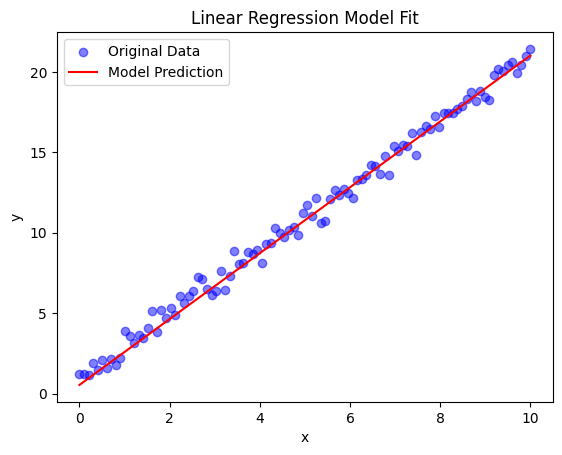

In [ ]:
import matplotlib.pyplot as plt

x_test = x_test = torch.linspace(0, 10, 100).view(-1, 1)  # 0〜10 の新しいデータ
y_pred = model(x_test).detach().numpy()

plt.scatter(dataset.x.numpy(), dataset.y.numpy(), label="Original Data", color="blue", alpha=0.5)

plt.plot(x_test.numpy(), y_pred, label="Model Prediction", color="red")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Model Fit")
plt.show()

ここからはCNNを学ぶ

In [54]:
image = torch.tensor([
    [3, 1, 2, 0, 1],
    [0, 1, 3, 2, 2],
    [1, 2, 0, 1, 0],
    [2, 1, 2, 3, 1],
    [0, 2, 1, 0, 3]
], dtype=torch.float32).view(1, 1, 5, 5) 

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)
conv.weight.data = torch.tensor([
    [[[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]]
], dtype=torch.float32)


# ✅ 畳み込みを適用
output = conv(image)

print("畳み込み結果：")
print(output.squeeze())  # 出力を見やすく

畳み込み結果：
tensor([[ 1., -1., -2.],
        [ 2.,  2., -2.],
        [ 0., -1.,  1.]], grad_fn=<SqueezeBackward0>)


In [55]:


# ✅ ダミー画像（1チャネル, 5×5 の白黒画像）
image = torch.tensor([
    [3, 1, 2, 0, 1],
    [0, 1, 3, 2, 2],
    [1, 2, 0, 1, 0],
    [2, 1, 2, 3, 1],
    [0, 2, 1, 0, 3]
], dtype=torch.float32).view(1, 1, 5, 5)  # (バッチサイズ=1, チャンネル=1, 高さ=5, 幅=5)

# ✅ パディングなし（padding=0）
conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)
print(f"出力サイズ（パディングなし）: {conv1(image).shape}")  # torch.Size([1, 1, 3, 3])

# ✅ パディングあり（padding=1）
conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)
print(f"出力サイズ（パディングあり）: {conv2(image).shape}")  # torch.Size([1, 1, 5, 5])


出力サイズ（パディングなし）: torch.Size([1, 1, 3, 3])
出力サイズ（パディングあり）: torch.Size([1, 1, 5, 5])


In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root="/home/sentooooooon/pytorch-learnings/data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="/home/sentooooooon/pytorch-learnings/data", train=False, transform=transform, download=True)

# ✅ DataLoader でバッチ処理
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

images, labels = next(iter(train_loader))
print(f"📌 画像のサイズ: {images.shape}, ラベル: {labels.shape}") 

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.28MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 407kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.03MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.93MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 10.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 400kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.29MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.28MB/s]

📌 画像のサイズ: torch.Size([64, 1, 28, 28]), ラベル: torch.Size([64])


In [65]:
import torch.nn as nn
import torch.nn.functional as F

# ✅ CNN モデルを定義
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)  # 28x28 → 28x28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 28x28 → 14x14
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)  # 14x14 → 14x14
        self.fc1 = nn.Linear(16 * 7 * 7, 128)  # 全結合層
        self.fc2 = nn.Linear(128, 10)  # 出力層（10クラス分類）

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 畳み込み → ReLU → プーリング
        x = self.pool(F.relu(self.conv2(x)))  # 畳み込み → ReLU → プーリング
        x = torch.flatten(x, 1)  # 2D を 1D に変換
        x = F.relu(self.fc1(x))  # 全結合層
        x = self.fc2(x)  # 出力層
        return x

# ✅ モデルをインスタンス化
model = SimpleCNN()
print(model)


SimpleCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [66]:
import torch.optim as optim

# ✅ 損失関数 & 最適化手法
criterion = nn.CrossEntropyLoss()  # 損失関数（分類タスク用）
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 最適化アルゴリズム

# ✅ 学習ループ
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # 勾配の初期化
        outputs = model(images)  # 予測
        loss = criterion(outputs, labels)  # 損失計算
        loss.backward()  # 逆伝播
        optimizer.step()  # パラメータ更新
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

print("✅ 学習完了！")


Epoch [1/5], Loss: 0.2325
Epoch [2/5], Loss: 0.0690
Epoch [3/5], Loss: 0.0485
Epoch [4/5], Loss: 0.0373
Epoch [5/5], Loss: 0.0306
✅ 学習完了！


In [67]:
correct = 0
total = 0
with torch.no_grad():  # 勾配を記録しない（評価時は不要）
    for images, labels in test_loader:
        outputs = model(images)  # 予測
        _, predicted = torch.max(outputs, 1)  # 最も確率が高いクラスを取得
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ テスト精度: {accuracy:.2f}%")


✅ テスト精度: 98.87%
